In [2]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

In [4]:
from qiskit import QuantumCircuit, Aer, execute

# Define the search space
n = 10

# Create the quantum circuit
qc = QuantumCircuit(n)

# Initialize the qubits in a uniform superposition
for i in range(n):
  qc.h(i)

# Define the oracle
oracle = QuantumCircuit(n)

# Implement the oracle function
for i in range(n):
  oracle.cx(i, (i + 1) % n)

# Apply the oracle
qc = qc.compose(oracle, range(n))

# Apply the Grover operator
qc.h(range(n))
qc.x(range(n))
qc.z(range(n))
qc.h(range(n))

# Measure the qubits
qc.measure_all()

# Run the circuit on a simulator
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()

# Print the results
print(result.counts())

Traceback (most recent call last):
  Cell In[4], line 37
    print(result.counts())
  File /opt/conda/lib/python3.10/site-packages/qiskit/result/result.py:117 in __getattr__
    raise AttributeError(f"Attribute {name} is not defined") from ex
AttributeError: Attribute counts is not defined

Use %tb to get the full traceback.


In [5]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

# Define the function that creates the oracle for a specific problem
def create_oracle(circuit, target):
    circuit.cz(range(num_qubits), target)
    return circuit

# Define the function that creates the inversion about the mean operation
def create_inversion(circuit):
    circuit.h(range(num_qubits))
    circuit.x(range(num_qubits))
    circuit.h(num_qubits - 1)
    circuit.mct(list(range(num_qubits - 1)), num_qubits - 1)
    circuit.h(num_qubits - 1)
    circuit.x(range(num_qubits))
    circuit.h(range(num_qubits))
    return circuit

# Define the function for Grover's algorithm
def grover_algorithm(num_qubits, target):
    circuit = QuantumCircuit(num_qubits, num_qubits)
    
    # Apply Hadamard gates to all qubits
    circuit.h(range(num_qubits))
    
    # Set the number of iterations (k) based on the number of qubits and the target
    k = int(round((3.14/4) * (2 ** (num_qubits/2))))
    
    # Apply Grover's iterations
    for _ in range(k):
        circuit = create_oracle(circuit, target)
        circuit = create_inversion(circuit)
    
    # Measure all qubits
    circuit.measure(range(num_qubits), range(num_qubits))
    
    return circuit

# Define the number of qubits and the target value (as a binary string)
num_qubits = 4
target = '1010'

# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
circuit = grover_algorithm(num_qubits, target)
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

# Plot the histogram of the results
plot_histogram(counts)


Traceback (most recent call last):
  Cell In[5], line 46
    circuit = grover_algorithm(num_qubits, target)
  Cell In[5], line 32 in grover_algorithm
    circuit = create_oracle(circuit, target)
  Cell In[5], line 6 in create_oracle
    circuit.cz(range(num_qubits), target)
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:4129 in cz
    return self.append(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1287 in append
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1287 in <listcomp>
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1168 in qbit_argument_conversion
    return _bit_argument_conversion(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5117 in _bit_argumen

In [6]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

# Define the function that creates the oracle for a specific problem
def create_oracle(circuit, target):
    circuit.cz(range(num_qubits), target)
    return circuit

# Define the function that creates the inversion about the mean operation
def create_inversion(circuit):
    circuit.h(range(num_qubits))
    circuit.x(range(num_qubits))
    circuit.h(num_qubits - 1)
    circuit.mct(list(range(num_qubits - 1)), num_qubits - 1)
    circuit.h(num_qubits - 1)
    circuit.x(range(num_qubits))
    circuit.h(range(num_qubits))
    return circuit

# Define the function for Grover's algorithm
def grover_algorithm(num_qubits, target):
    circuit = QuantumCircuit(num_qubits, num_qubits)
    
    # Apply Hadamard gates to all qubits
    circuit.h(range(num_qubits))
    
    # Set the number of iterations (k) based on the number of qubits and the target
    k = int(round((3.14/4) * (2 ** (num_qubits/2))))
    
    # Apply Grover's iterations
    for _ in range(k):
        circuit = create_oracle(circuit, target)
        circuit = create_inversion(circuit)
    
    # Measure all qubits
    circuit.measure(range(num_qubits), range(num_qubits))
    
    return circuit

# Define the number of qubits and the target value (as a binary string)
num_qubits = 4
target = int('1010', 2)  # Convert binary string to integer

# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
circuit = grover_algorithm(num_qubits, target)
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

# Plot the histogram of the results
plot_histogram(counts)


Traceback (most recent call last):
  Cell In[6], line 46
    circuit = grover_algorithm(num_qubits, target)
  Cell In[6], line 32 in grover_algorithm
    circuit = create_oracle(circuit, target)
  Cell In[6], line 6 in create_oracle
    circuit.cz(range(num_qubits), target)
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:4129 in cz
    return self.append(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1287 in append
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1287 in <listcomp>
    expanded_qargs = [self.qbit_argument_conversion(qarg) for qarg in qargs or []]
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:1168 in qbit_argument_conversion
    return _bit_argument_conversion(
  File /opt/conda/lib/python3.10/site-packages/qiskit/circuit/quantumcircuit.py:5110 in _bit_argumen

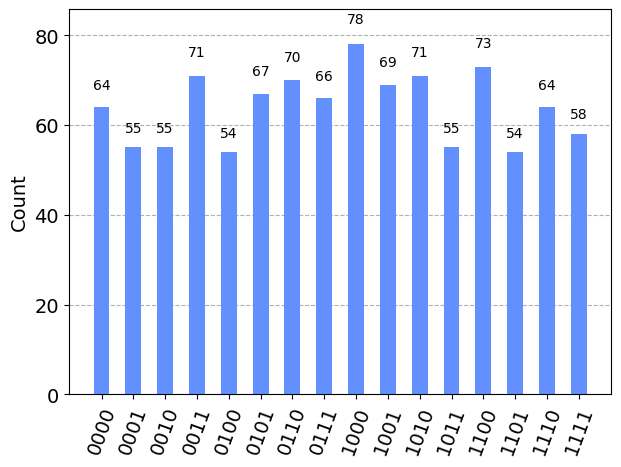

In [7]:
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.visualization import plot_histogram

# Define the function that creates the oracle for a specific problem
def create_oracle(circuit, target):
    for i in range(len(target)):
        if target[i] == '1':
            circuit.cx(i, num_qubits)
    return circuit

# Define the function that creates the inversion about the mean operation
def create_inversion(circuit):
    circuit.h(range(num_qubits))
    circuit.x(range(num_qubits))
    circuit.h(num_qubits - 1)
    circuit.mct(list(range(num_qubits - 1)), num_qubits - 1)
    circuit.h(num_qubits - 1)
    circuit.x(range(num_qubits))
    circuit.h(range(num_qubits))
    return circuit

# Define the function for Grover's algorithm
def grover_algorithm(num_qubits, target):
    circuit = QuantumCircuit(num_qubits + 1, num_qubits)
    
    # Apply Hadamard gates to all qubits
    circuit.h(range(num_qubits + 1))
    
    # Set the number of iterations (k) based on the number of qubits and the target
    k = int(round((3.14/4) * (2 ** (num_qubits/2))))
    
    # Apply Grover's iterations
    for _ in range(k):
        circuit = create_oracle(circuit, target)
        circuit = create_inversion(circuit)
    
    # Measure the first 'num_qubits' qubits
    circuit.measure(range(num_qubits), range(num_qubits))
    
    return circuit

# Define the number of qubits and the target value (as a binary string)
num_qubits = 4
target = '1010'

# Run the circuit on a simulator
simulator = Aer.get_backend('qasm_simulator')
circuit = grover_algorithm(num_qubits, target)
job = execute(circuit, simulator, shots=1024)
result = job.result()
counts = result.get_counts(circuit)

# Plot the histogram of the results
plot_histogram(counts)
